#### **This script converts the xnet graph to dataframe**

In [5]:
from xnetwork import load
import coordinationz.cohashtag_helper as cohp

/N/slate/potem/project/coordinationz/source/coordinationz/config.py:31: UserWarning: Config file not found: None
  warnings.warn(str(e))
/N/slate/potem/project/coordinationz/source/coordinationz/config.py:32: UserWarning: Tried to find config.toml in this directory, and parent directories.
  warnings.warn("Tried to find config.toml in this directory, and parent directories.")
/N/slate/potem/project/coordinationz/source/coordinationz/config.py:33: UserWarning: Please create a config.toml file with the necessary settings.
  warnings.warn("Please create a config.toml file with the necessary settings.")
/N/slate/potem/project/coordinationz/source/coordinationz/config.py:34: UserWarning: Or manually call coordinationz.load_config('path/to/config.toml') in your code.
  warnings.warn("Or manually call coordinationz.load_config('path/to/config.toml') in your code.")
/N/slate/potem/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter a

In [2]:
file = './data/cuba_082020_tweets_onlyRetweets_coretweet.xnet'
graph_10 = load(file)

In [6]:
filename = './data/cuba_082020_tweets_onlyRetweets_coretweet.gml'
G = cohp.save_xnet_to_gml(graph_10, filename)

In [167]:
total = 0
total_control = 0
all_io = []
all_control = []
all_present_node = []
all_check = []
for i, node in G.nodes(data=True):
    if node['category'] == 'io':
        total = total + 1
        all_io.append(i)
        
    if node['category'] == 'control':
        total_control = total_control + 1
        all_control.append(i)
        
    all_present_node.append(i)
    all_check.append([i, node['category']])
        
print('Total io :', total)
print(node)
print('Total control :', total_control)
print('**********')
all_node = []
total_edges = 0
for u, v, attrs in G.edges(data=True):
    if u not in all_node:
        all_node.append(u)
    if v not in all_node:
        all_node.append(v)
    total_edges = total_edges + 1
    
print(u, v, attrs)
print('Total node :', len(all_node))
print('Total edges :', total_edges)

print('***********')
print(len(set(all_present_node) - set(all_node)))
print(len(set(all_present_node).intersection(set(all_node))))

Total io : 443
{'Label': '999964025038483456', 'category': 'control', 'left_degree': 33.0}
Total control : 12143
**********
12570 12585 {'weight': 0.5424588917365284, 'pvalue': 1e-05, 'zscore': 650.3914895449764}
Total node : 246
Total edges : 465
***********
12340
246


In [175]:
(pd.DataFrame(data=all_check,
              columns=['node', 'category'],
             )
).to_pickle('./data/retweet_index_category.pkl.gz')

In [20]:
filename = './data/cuba_082020_tweets_onlyRetweets_coretweet.pkl.gz'

import importlib

importlib.reload(cohp)

cohp.save_all_graph_attr(G, filename)

import pandas as pd
filename = './data/cuba_082020_tweets_onlyRetweets_coretweet.pkl.gz'

df = pd.read_pickle(filename)

#### **Check label**

In [33]:
sources = set(df.loc[df['source_label'] == 'io']['source'])
targets = set(df.loc[df['target_label'] == 'io']['target'])

print(len(sources.union(targets)))

41


In [34]:
sources = set(df.loc[df['source_label'] == 'control']['source'])
targets = set(df.loc[df['target_label'] == 'control']['target'])

print(len(sources.union(targets)))

205


In [37]:
41/205

0.2

#### **Get degree of node**

In [42]:
df.head()

,weight,pvalue,zscore,source,target,source_label,target_label
0,0.326712,0.00001,374.018450,1000522498268680193,924114230781063169,control,control
1,0.339437,0.00001,346.913110,1003827388705329153,152709803,control,control
2,0.580730,0.00001,629.048076,1008830474020630528,511190468,control,control
3,0.405542,0.00001,inf,1014851107745497088,2954364053,control,control
4,0.536031,0.00001,613.950096,1021872428346212352,923246371863281665,control,control


In [128]:
df['weight'] = df['weight'].apply(lambda x: round(x,2))

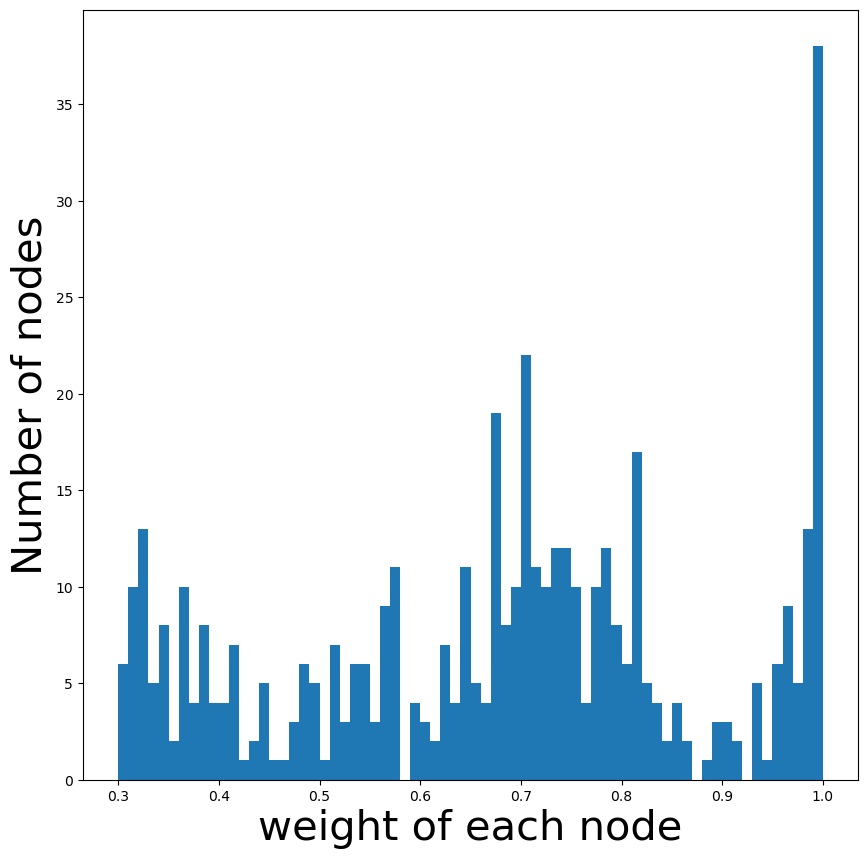

In [186]:
import coordinationz.visualization as vz

parameters =  {
        'data': df,
        'fontsize': 30,
        'complementary': True,
        'tick_size':20,
        'columns': [
            {'column': 'weight',
             'label': '',
            }
        ],
        'xlabel': 'weight of each node',
        'ylabel': 'Number of nodes',
        'bins': None,
        # 'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'title': '',
        'save': {
            'path': './plots/',
            'filename': 'retweet_weight.png'
        },
        'random_color': False
    }

vz.plot_histogram(parameters)

In [44]:
df['pvalue'].max()

1e-05

In [68]:
df['weight'].min()

0.30001127799401284

In [53]:
degrees = dict(G.degree())
# Convert to DataFrame
degree_df = pd.DataFrame(degrees.items(), columns=['Node', 'Degree'])

# Display the DataFrame
print("Degree DataFrame:")
print(degree_df)

Degree DataFrame:
        Node  Degree
0          0       0
1          1       0
2          2       0
3          3       0
4          4       0
...      ...     ...
12581  12581       0
12582  12582       0
12583  12583       0
12584  12584       0
12585  12585       8

[12586 rows x 2 columns]


#### **Check distribution**

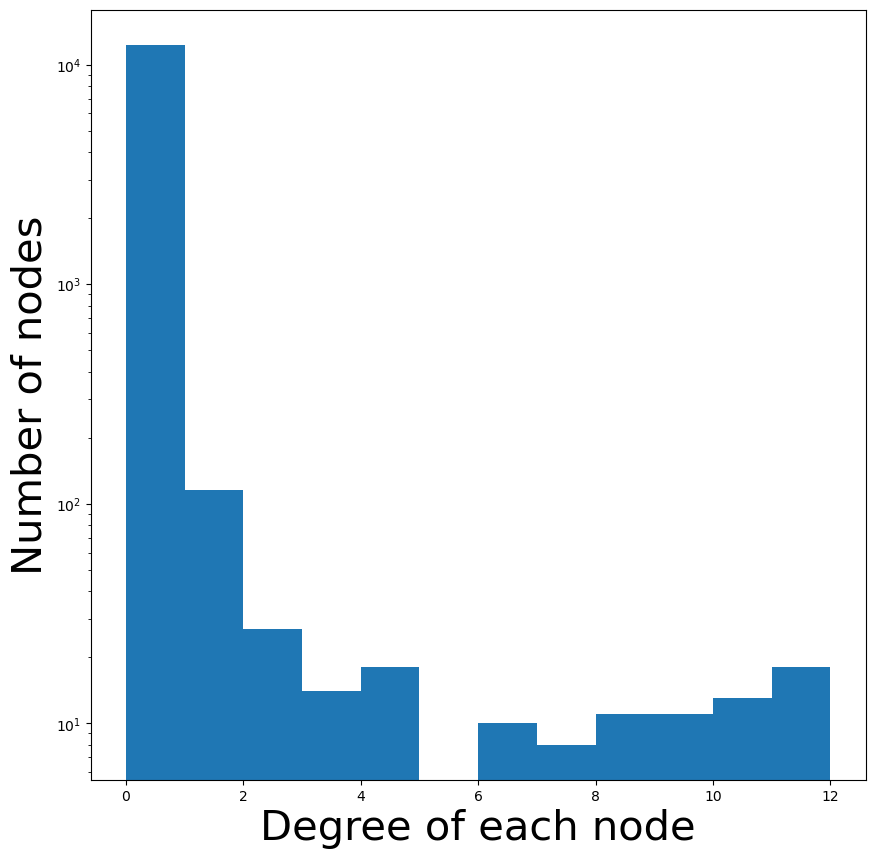

In [66]:
import coordinationz.visualization as vz

parameters =  {
        'data': degree_df,
        'fontsize': 30,
        'complementary': True,
        'tick_size':20,
        'columns': [
            {'column': 'Degree',
             'label': '',
            }
        ],
        'xlabel': 'Degree of each node',
        'ylabel': 'Number of nodes',
        'bins': None,
        # 'legend_location': '',
        'log_yscale': True,
        'log_xscale': False,
        'title': '',
        'save': {
            'path': './plots/',
            'filename': 'retweet_degree.png'
        },
        'random_color': False
    }

vz.plot_histogram(parameters)

In [72]:
# all_io = []
# all_control = []

df_io = degree_df.loc[degree_df['Node'].isin(all_io)]
df_control = degree_df.loc[degree_df['Node'].isin(all_control)]

./plots/io_control_degree.png


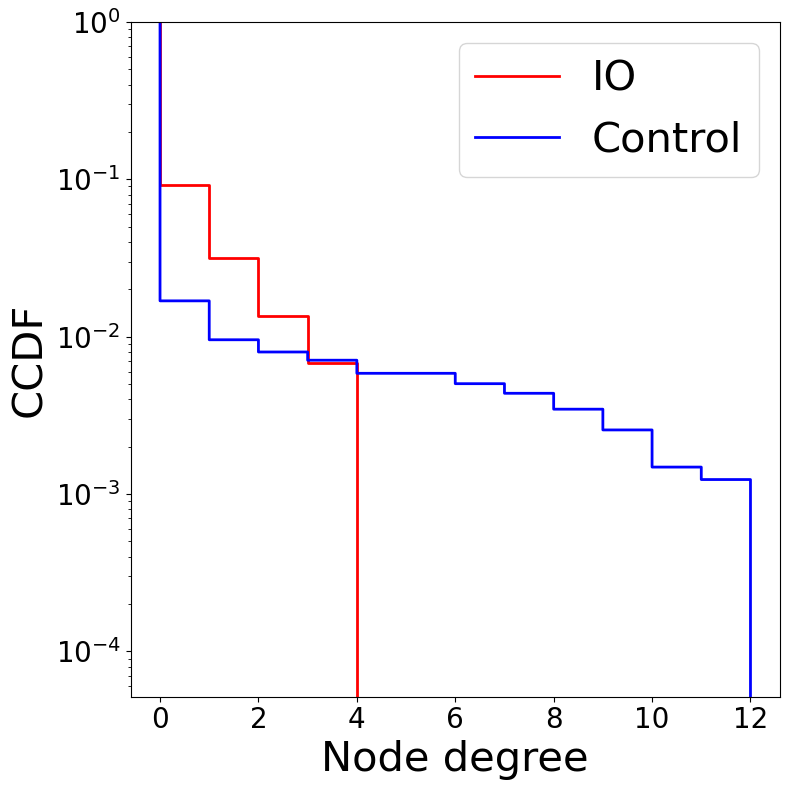

In [77]:
parameters =  {
        'data': [df_io, df_control],
        'fontsize': 30,
        'complementary': True,
        'tick_size':20,
        'columns': [
            {'column': 'Degree',
             'label': 'IO',
            },
             {'column': 'Degree',
             'label': 'Control',
            }
        ],
        'xlabel': 'Node degree',
        'ylabel': '',
        'legend_location': 'upper right',
        'log_yscale': True,
        'log_xscale': False,
        'save': {
            'path': './plots/',
            'filename': 'io_control_degree.png'
        },
        'random_color': False
    }

vz.ccdf(parameters)

#### **Evaluate**

In [141]:
def remove_isolated_nodes(H):
    isolated_nodes = [node for node in H.nodes() if H.degree(node) == 0]

    # Remove isolated nodes from the graph
    H.remove_nodes_from(isolated_nodes)
    
    return H

def disintegrate_network(G, 
                         weight_list,
                         removal_strategy='weight',
                         filename=None
                         ):
    H = G.copy()
    
    H = remove_isolated_nodes(H)
    org_node = H.number_of_nodes()
    
    if removal_strategy == 'weight':
        H_new = H.copy()
    
        all_data = []
        for i in weight_list:
            # Identify edges to remove based on the weight threshold
            edges_to_remove = []
            for u, v, weight in H_new.edges(data='weight'):
                if round(weight,2) == i:
                    edges_to_remove.append((u, v))
                    
                # print(i, round(weight,2))

            # Remove the filtered edges from the graph
            H_new.remove_edges_from(edges_to_remove)
            
            H_new = remove_isolated_nodes(H_new)

            num_nodes = H_new.number_of_nodes()
            
            delta = org_node - num_nodes

            all_data.append([i, delta, org_node, num_nodes])
            
        (pd.DataFrame(data=all_data,
                      columns=['weight', 'delta', 'org_node', 'remain']
                     )
        ).to_pickle(filename)
                      

In [131]:
min_weight=df['weight'].min()
max_weight=df['weight'].max()

In [132]:
print(min_weight)
print(max_weight)

0.3
1.0


In [130]:
df['weight'].head()

0    0.33
1    0.34
2    0.58
3    0.41
4    0.54
Name: weight, dtype: float64

In [234]:
filename = './data/node_change.pkl.gz'
import numpy as np

weight_list = np.arange(min_weight, max_weight+0.01, 0.01)
print(weight_list)
disintegrate_network(G, 
                         weight_list,
                         removal_strategy='weight',
                         filename=filename
                    )

[0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99
 1.  ]


#### **Check distribution**

In [235]:
filename = './data/node_change.pkl.gz'

df_dis = pd.read_pickle(filename)

In [147]:
# df_1 = df_dis.loc[df_dis['weight'] <= 1.01]

In [236]:
df_dis

,weight,delta,org_node,remain
0,0.30,5,246,241
1,0.31,11,246,235
2,0.32,25,246,221
3,0.33,31,246,215
4,0.34,42,246,204
...,...,...,...,...
66,0.96,42,246,204
67,0.97,42,246,204
68,0.98,42,246,204
69,0.99,42,246,204


In [238]:
df_dis.loc[df_dis['delta'] == df_dis['delta'].max()]

,weight,delta,org_node,remain
4,0.34,42,246,204
5,0.35,42,246,204
6,0.36,42,246,204
7,0.37,42,246,204
8,0.38,42,246,204
...,...,...,...,...
66,0.96,42,246,204
67,0.97,42,246,204
68,0.98,42,246,204
69,0.99,42,246,204


In [152]:
import networkx as nx
nx.write_gml(G, './data/test.gml')

./plots//delta_graph.png
./plots/delta_graph.png


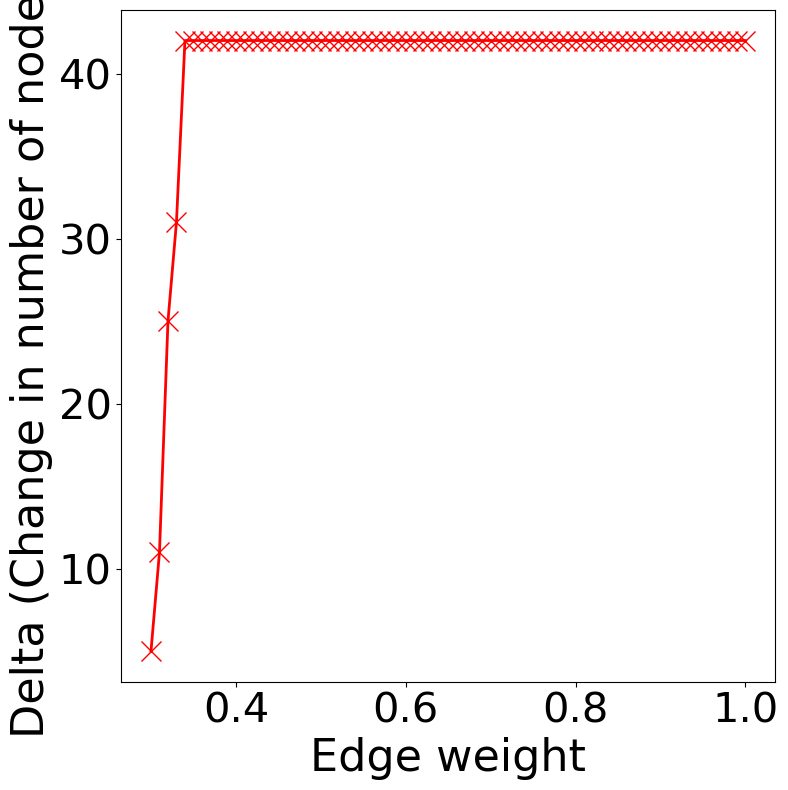

In [239]:
parameters =  {
        'data': df_dis,
        'fontsize': 30,
        'complementary': True,
        'tick_size':20,
        'columns': [
            {'column': 'delta',
             'label': 'Delta',
            },
            #  {'column': 'org_node',
            #  'label': 'Original no. of node',
            # },
            # {'column': 'remain',
            #  'label': 'nodes after filtering',
            # },
        ],
        'x': 'weight',
        'xlabel': 'Edge weight',
        'ylabel': 'Delta (Change in number of nodes)',
        # 'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots/',
            'filename': 'delta_graph.png'
        },
        'random_color': False
}

import importlib

importlib.reload(vz)

vz.line_plot(parameters)

In [240]:
threshold = 0.34
df_1 = df.loc[df['weight'] >= 0.34]
df_0 = df.loc[df['weight']<0.34]

In [241]:
df_1['source_label'].unique()

array(['control', 'io'], dtype=object)

In [242]:
df_1['target_label'].unique()

array(['control', 'io'], dtype=object)

In [243]:
df.loc[(df['source_label'] == 'control') & (df['target_label'] == 'io')]

,weight,pvalue,zscore,source,target,source_label,target_label


In [244]:
len(df.loc[(df['source_label'] == 'io') & (df['target_label'] == 'io')])

32

In [245]:
len(df.loc[(df['source_label'] == 'control') & (df['target_label'] == 'control')])

433

In [220]:
len(df_1.loc[(df_1['source_label'] == 'io') & (df_1['target_label'] == 'io')])

16

In [223]:
len(df_1.loc[(df_1['source_label'] == 'control') & (df_1['target_label'] == 'control')])

415

In [219]:
len(df_0.loc[(df_0['source_label'] == 'io') & (df_0['target_label'] == 'io')])

16

In [224]:
len(df_0.loc[(df_0['source_label'] == 'control') & (df_0['target_label'] == 'control')])

18

In [246]:
df_check = df
df_check['edge_label'] = 0
df_check.loc[df['weight'] >= 0.34, 'edge_label'] = 1

In [247]:
df_check['act_label'] = 0
df_check.loc[(df_check['source_label'] == 'io') & (df_check['target_label'] == 'io')] = 1

In [282]:
y_test = df_check['act_label']
y_test_preds = df_check['edge_label']
print('F1 score :', f1_score(y_test,y_test_preds))
print('Recall :', recall_score(y_test,y_test_preds))
print('Precision :',precision_score(y_test,y_test_preds))

F1 score : 0.13361169102296452
Recall : 1.0
Precision : 0.07158836689038031


#### **Clustering based**

In [165]:
H = G.copy()
    
H = remove_isolated_nodes(H)
weighted_clustering = nx.clustering(H, weight='weight')
clust_df = pd.DataFrame(weighted_clustering.items(), 
                         columns=['Node', 'weighted_clustering'])

# Display the DataFrame
print("Degree DataFrame:")
print(clust_df)

Degree DataFrame:
      Node  weighted_clustering
0        6             0.000000
1       33             0.000000
2       66             0.000000
3       99             0.000000
4      141             0.000000
..     ...                  ...
241  12544             0.638684
242  12567             0.345428
243  12570             0.471396
244  12579             0.000000
245  12585             0.524534

[246 rows x 2 columns]


In [176]:
df_index = pd.read_pickle('./data/retweet_index_category.pkl.gz')

In [177]:
df_index

,node,category
0,0,control
1,1,control
2,2,control
3,3,control
4,4,control
...,...,...
12581,12581,control
12582,12582,control
12583,12583,control
12584,12584,control


In [192]:
df_merge = clust_df.merge(df_index,
                          left_on='Node',
                          right_on='node'
                         )

In [193]:
df_merge_1 = df_merge.loc[df_merge['category'] == 'io']
df_merge_0 = df_merge.loc[df_merge['category'] == 'control']

./plots/io_control_clustering.png


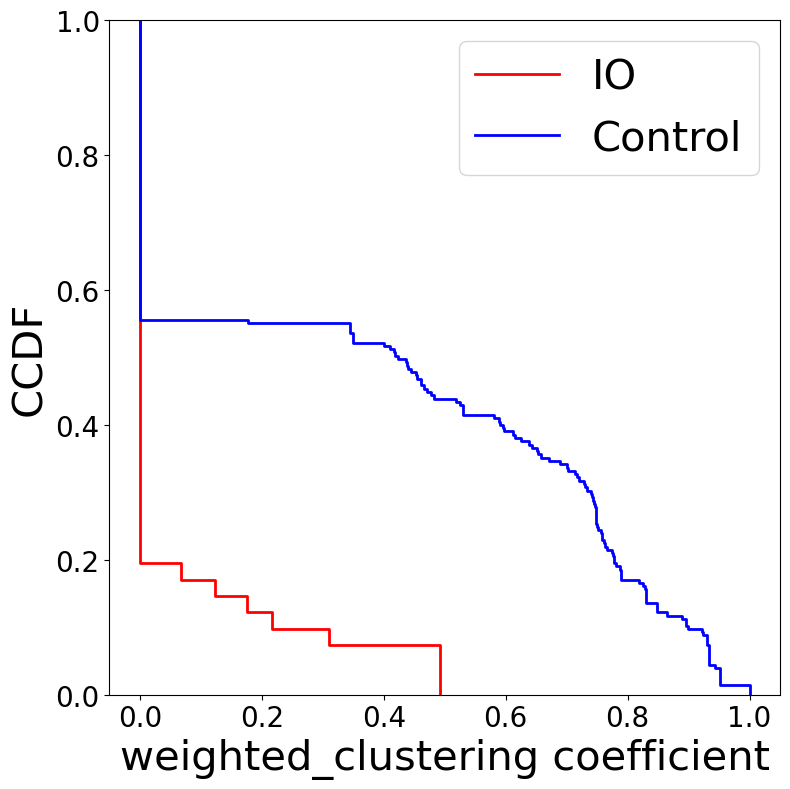

In [185]:
parameters =  {
        'data': [df_merge_1, df_merge_0],
        'fontsize': 30,
        'complementary': True,
        'tick_size':20,
        'columns': [
            {'column': 'weighted_clustering',
             'label': 'IO',
            },
             {'column': 'weighted_clustering',
             'label': 'Control',
            }
        ],
        'xlabel': 'weighted_clustering coefficient',
        'ylabel': '',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots/',
            'filename': 'io_control_clustering.png'
        },
        'random_color': False
    }

vz.ccdf(parameters)

In [190]:
df_merge.head()

,Node,weighted_clustering,node,category,label
0,6,0.0,6,control,0
1,33,0.0,33,control,0
2,66,0.0,66,control,0
3,99,0.0,99,control,0
4,141,0.0,141,control,0


In [194]:
df_merge['label'] = 0
df_merge.loc[df_merge['category'] == 'io', 'label'] = 1

In [198]:
from sklearn.metrics import roc_curve, roc_auc_score

In [267]:
y_test = df_merge['label']
y_probs = df_merge['weighted_clustering']
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


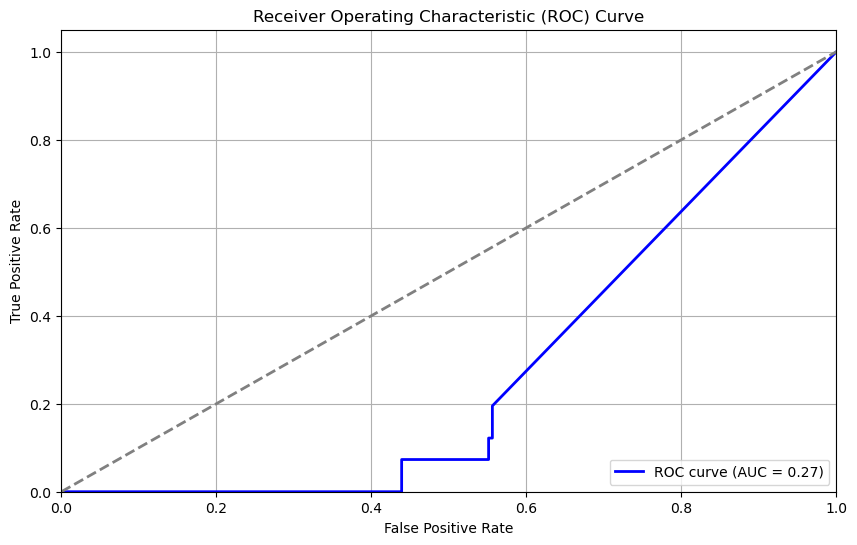

In [268]:
# Plot the ROC curve
import matplotlib.pyplot as plt
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### **Pvalue**

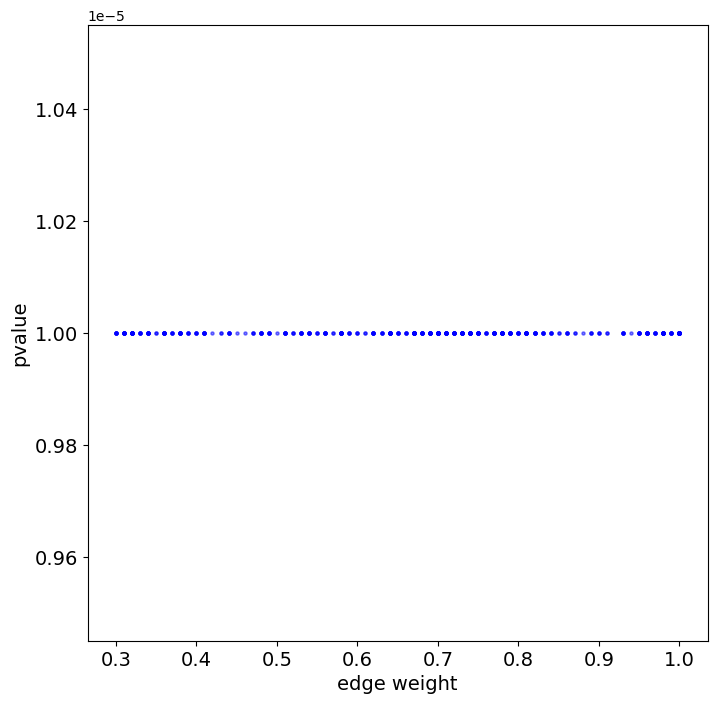

In [207]:
import coordinationz.visualization as vz

parameters =  {
        'data': df,
        'fontsize': 14,
        'columns': {
            'y': 'pvalue',
            'x': 'weight',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'edge weight',
        'ylabel': 'pvalue',
        'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        'title': f'',
        'save': {
            'path': f'./plots',
            'filename': f'cuba_weight_pvalue.png'
        },
    }

vz.scatter_plot(parameters)

#### **Test train**

In [276]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold

def evaluation_metrics(labels_map,n_splits=5):
    """
    Args:
        label_map: dataframe with the classification label for each userid (columns = ['userid', 'label' (0 or 1),'eigen_centrality])
    Returns:
        Average Performance across 10 folds
    """

    skf = StratifiedKFold(n_splits=n_splits)
    X = labels_map[['node','weighted_clustering']]
    y = labels_map['label']
    skf.get_n_splits(X, y)

    metrics = {"f1_score":0,"recall":0,"precision":0}

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # thresh = [i for i in range(1,100,2)]
        thresh = np.arange(0,1.01,0.01)
        # print(thresh)
        # centrality_ranges = [np.percentile(
        #     X_train['weighted_clustering'].values,t
        # ) for t in thresh]
        labels_map['weighted_clustering'] = labels_map['weighted_clustering'].apply(
            lambda x: round(x,2)
        )
        centrality_ranges = labels_map.sort_values(by=['weighted_clustering'],
                                                   ascending=True
                                                  )['weighted_clustering'].tolist()
        max_centrality_range = -1
        max_f1_score = -1
        for cent in centrality_ranges:
            new_y_train = X_test['weighted_clustering'].apply(lambda x: 1 if x>=cent else 0)
            if(max_f1_score<f1_score(new_y_train,y_train)):
                max_f1_score = f1_score(new_y_train,y_train)
                max_centrality_range = cent

        y_test_preds = X_test['weighted_clustering'].apply(lambda x: 1 if x>=max_centrality_range else 0)

        metrics['f1_score']+=f1_score(y_test,y_test_preds)
        metrics['recall']+=recall_score(y_test,y_test_preds)
        metrics['precision']+=precision_score(y_test,y_test_preds)

    metrics['f1_score']/=float(n_splits)
    metrics['recall']/=float(n_splits)
    metrics['precision']/=float(n_splits)

    return metrics

In [250]:
df_merge.head()

,Node,weighted_clustering,node,category,label
0,6,0.0,6,control,0
1,33,0.0,33,control,0
2,66,0.0,66,control,0
3,99,0.0,99,control,0
4,141,0.0,141,control,0


In [260]:
len(df_merge.loc[df_merge['category'] == 'control'])

205

In [261]:
len(df_merge.loc[df_merge['category'] == 'io'])

41

In [277]:
evaluation_metrics(df_merge,n_splits=3)

ValueError: Found input variables with inconsistent numbers of samples: [82, 164]

In [294]:
for node in H.nodes(data=True):
    print(node)
    break

(6, {'Label': '1000522498268680193', 'category': 'control', 'left_degree': 43.0})


In [293]:
for u, v, attr in H.edges(data=True):
    print(attr)
    break

{'weight': 0.32671197774031946, 'pvalue': 1e-05, 'zscore': 374.0184499987242}


In [287]:
import networkx as nx
nx.write_gml(H, './data/test_H.gml')

In [291]:
G = nx.Graph()
G.add_node(0)
nx.set_node_attributes(G, {0: "red", 1: "blue"}, name="color")
for  node in G.nodes(data=True):
    print(node)
    break

(0, {'color': 'red'})


In [292]:
nx.write_gexf(H, "./data/test.gexf")